<a href="https://www.kaggle.com/code/kunalkishore01/ab-testing-marketing-data?scriptVersionId=216072115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

**A/B Testng on ad campaign data**  
Ads were run, and the conversion rates of users were analyzed to statistically evaluate the significance of the association between running ads and customer conversions.  

There are two test groups for A/B testing:
1) **Ad Group**: Users who were exposed to advertisements.
2) **PSA Group**: Users who were exposed to Public Service Announcements (PSAs) and made their buying decisions without seeing any ads on the company website

**Objective**  

The objective of the analysis is to determine whether running ads was a successful strategy and to assess whether the difference between the test groups is statistically significant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.drop(['Unnamed: 0','user id'],axis =1 , inplace =True)

In [5]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [6]:
df_cat=df[['test group', 'converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [7]:
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

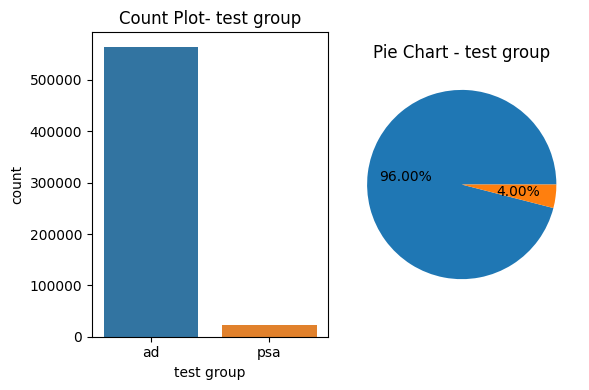

In [8]:
variable='test group'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

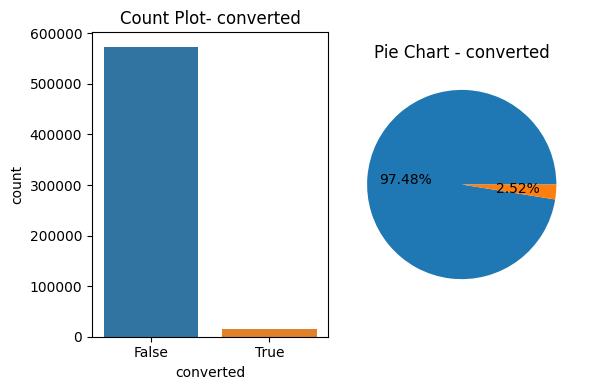

In [9]:
variable='converted'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

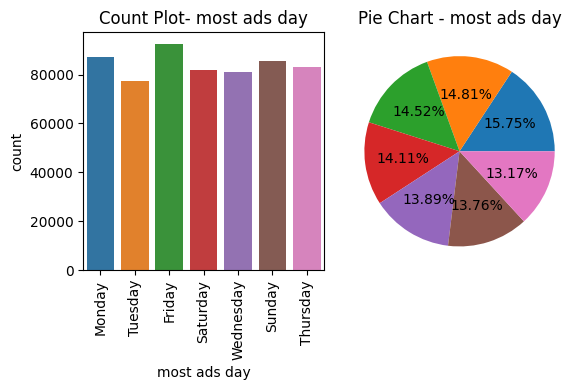

In [10]:

variable='most ads day'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation =90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

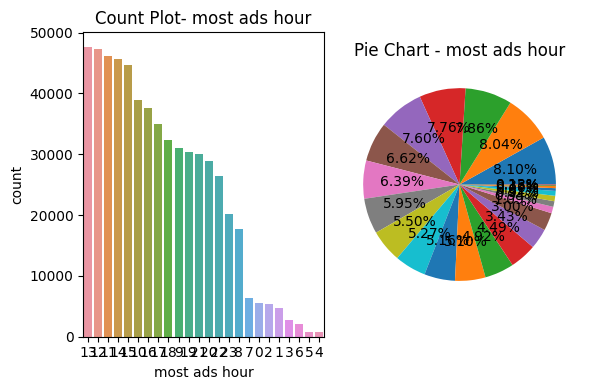

In [11]:
variable='most ads hour'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x= variable,data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')
plt.tight_layout()
plt.show()

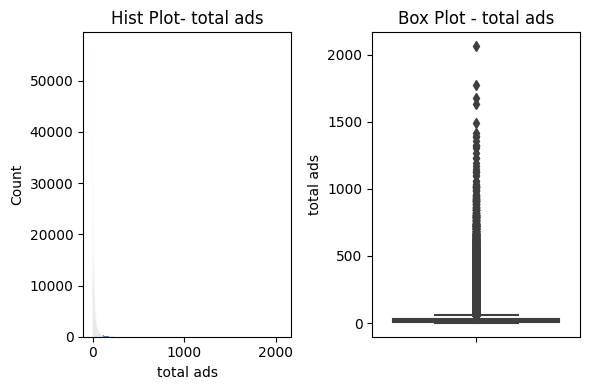

In [12]:
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable,data=df)
plt.title(f'Hist Plot- {variable}')

plt.subplot(1,2,2)
sns.boxplot(y= variable,data = df)
plt.title(f'Box Plot - {variable}')
plt.tight_layout()
plt.show()

In [13]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

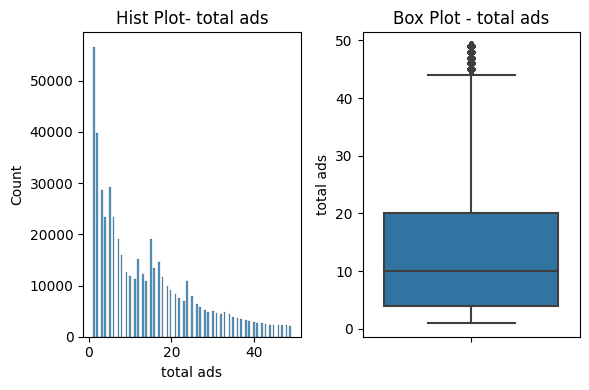

In [14]:
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x= variable,data=df[df['total ads']<50])
plt.title(f'Hist Plot- {variable}')

plt.subplot(1,2,2)
sns.boxplot(y= variable,data = df[df['total ads']<50])
plt.title(f'Box Plot - {variable}')
plt.tight_layout()
plt.show()

# Bivariate Aanalysis

In [15]:
conversion_test_group=pd.crosstab(df['test group'],df['converted'],normalize =  'index')
conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

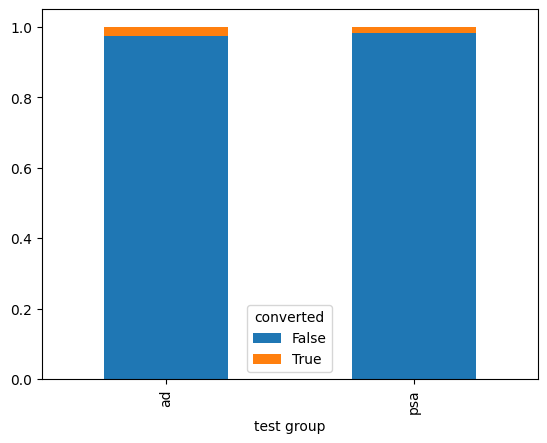

In [16]:
conversion_test_group.plot.bar(stacked= True)

converted        False     True 
most ads day                    
Friday        0.977788  0.022212
Monday        0.967188  0.032812
Saturday      0.978949  0.021051
Sunday        0.975524  0.024476
Thursday      0.978429  0.021571
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942


<Axes: xlabel='most ads day'>

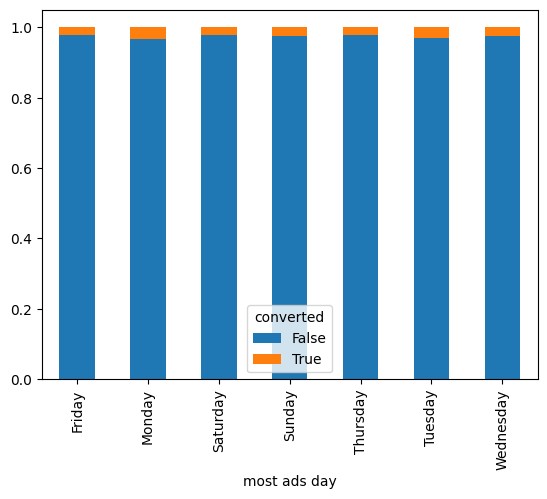

In [17]:
conversion_most_ads_day=pd.crosstab(df['most ads day'],df['converted'],normalize =  'index')
print(conversion_most_ads_day)
conversion_most_ads_day.plot.bar(stacked= True)

In [18]:
conversion_most_ads_hour=pd.crosstab(df['most ads hour'],df['converted'],normalize =  'index')
conversion_most_ads_hour.sort_values(by = True , ascending = False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


<Axes: xlabel='most ads hour'>

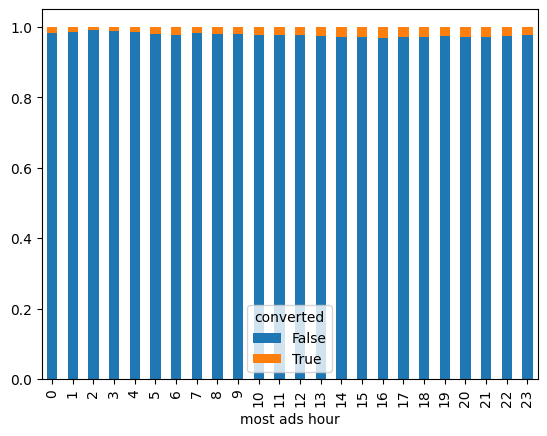

In [19]:
conversion_most_ads_hour.plot.bar(stacked= True)

<Axes: xlabel='converted', ylabel='total ads'>

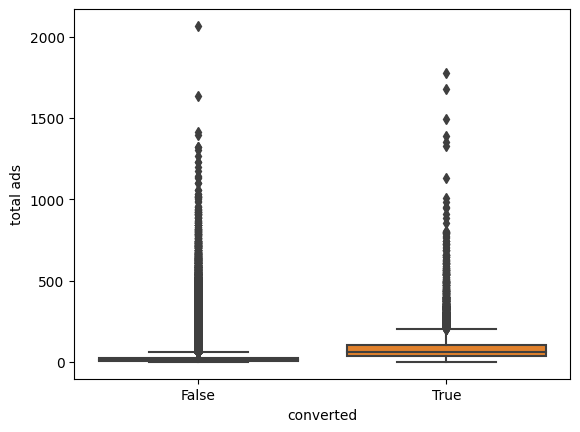

In [20]:
sns.boxplot(x='converted', y='total ads',data = df)

<Axes: xlabel='converted', ylabel='total ads'>

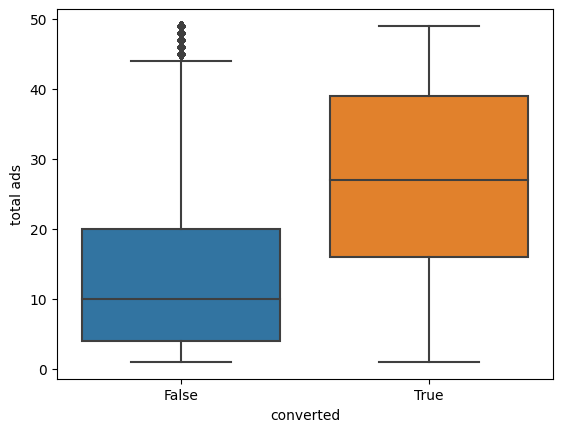

In [21]:
sns.boxplot(x='converted', y='total ads',data = df[df['total ads']<50])

# Statistical Test

In [22]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

When we talk about categorical variable and their dependency, we will perform chi square test to test their dependency  
variable= ['test group', 'most ads day', 'most ads hour']

Ho:Null Hypothsis : There is no association between {variables} and converted, these two categorical variable are not Associated  
H1 :Alternate Hypothesis : '{variables}'are significantly associated

In [23]:
from scipy.stats import chi2_contingency
alpha = 0.5
variable= ['test group', 'most ads day', 'most ads hour']
for variable in variable:
        contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])
        chi2,p,_,_=chi2_contingency(contingency_table)
        print("---------------------------")
        print(f'Chi Square Test for {variable} vs Converted')
        print(f'Chi Square Value:{chi2}')
        print(f'p-value: {p}')
    
        if p<alpha:
            
            print(f"Null Hypothesis Rejected : There is significant assoociation between {variable} and 'converted' variable")
        else:
            print(f"There is no significant association between {variable} and 'converted' variable")
        

---------------------------
Chi Square Test for test group vs Converted
Chi Square Value:54.005823883685245
p-value: 1.9989623063390075e-13
Null Hypothesis Rejected : There is significant assoociation between test group and 'converted' variable
---------------------------
Chi Square Test for most ads day vs Converted
Chi Square Value:410.0478857936585
p-value: 1.932184379244731e-85
Null Hypothesis Rejected : There is significant assoociation between most ads day and 'converted' variable
---------------------------
Chi Square Test for most ads hour vs Converted
Chi Square Value:430.76869230822086
p-value: 8.027629823696771e-77
Null Hypothesis Rejected : There is significant assoociation between most ads hour and 'converted' variable


Hence difference in conversion rates across different test groip is statistically significant ,showing the add were significantly impacted  the conversion rates  
Similary difference in conversion rates across days and hours are statisticlly different , hence ad should be shown in the hour of significant conversion rates instead of running it across all the day or hours